# EcoFOCIpy RCM vs ADCP

Compare data using the ERDDAP hosted datasets for both instruments:
- 2D EIN/Vel datasets for the ADCP
- 1D dataset (at a specific depth) embedded in the mooring dataset


In [10]:
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import EcoFOCIpy.io.erddap as erddap

url = "http://akutan.pmel.noaa.gov:8080/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [11]:
rcm_data = erddap.erddapMooredInstretrieve(url=url,mooringid='22bs5a',qclevel='final',instrid='22bs5a_an9_0063m')
rcm_data.columns = [x.split()[0] for x in rcm_data.columns]

In [12]:
rcm_data = rcm_data.set_index(pd.to_datetime(rcm_data['time'])).tz_localize(None).drop('time',axis=1)

In [13]:
adcp_xdf = xr.load_dataset('/Users/bell/ecoraid/2022/Moorings/22bsp5a/final_data_cf/22bsp5a_velein_0056m.nc')

In [14]:
adcp_data = adcp_xdf.sel({'depth':56},method='nearest').to_dataframe()

In [34]:
rcm_data.index = rcm_data.index - datetime.timedelta(seconds = 60*60*0.5)

(19253.0, 19605.0)

<Figure size 640x480 with 0 Axes>

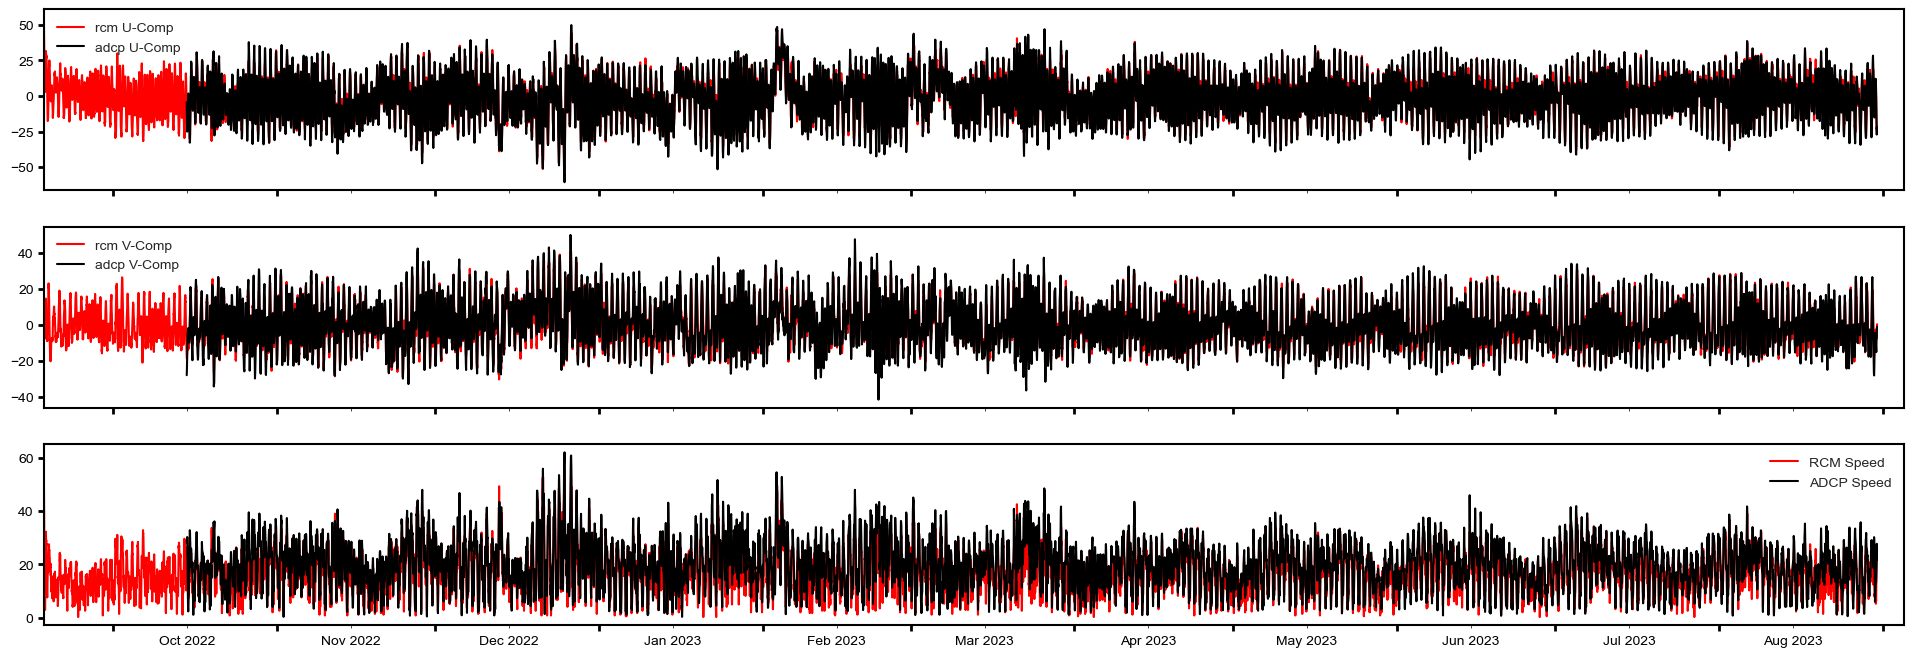

In [35]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
# copy is in the notebook examples
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(3,figsize=(24, 8),sharex=True)
ax[0].plot(rcm_data.index,rcm_data.u_comp_current,color='r',label='rcm U-Comp')
ax[1].plot(rcm_data.index,rcm_data.v_comp_current,color='r',label='rcm V-Comp')
ax[2].plot(rcm_data.index,
           np.sqrt(rcm_data.v_comp_current**2 + rcm_data.u_comp_current**2),
           color='r',label='RCM Speed')
ax[0].plot(adcp_data.index.get_level_values('time'),adcp_data.u_curr_comp,'k',label='adcp U-Comp')
ax[1].plot(adcp_data.index.get_level_values('time'),adcp_data.v_curr_comp,'k',label='adcp V-Comp')
ax[2].plot(adcp_data.index.get_level_values('time'),
           np.sqrt(adcp_data.v_curr_comp**2 + adcp_data.u_curr_comp**2),
           color='k',label='ADCP Speed')
ax[0].legend()
ax[1].legend()
ax[2].legend()

xfmt = mdates.DateFormatter('%d-%b')
ax[2].xaxis.set_major_locator(DayLocator(bymonthday=1))
ax[2].xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax[2].xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(DateFormatter(''))
ax[2].xaxis.set_tick_params(which='major', pad=3)
ax[2].xaxis.set_tick_params(which='minor', pad=5)

ax[2].set_xlim([datetime.date(2022,9,18),datetime.date(2023,9,5)])

(19344.0, 19352.0)

<Figure size 640x480 with 0 Axes>

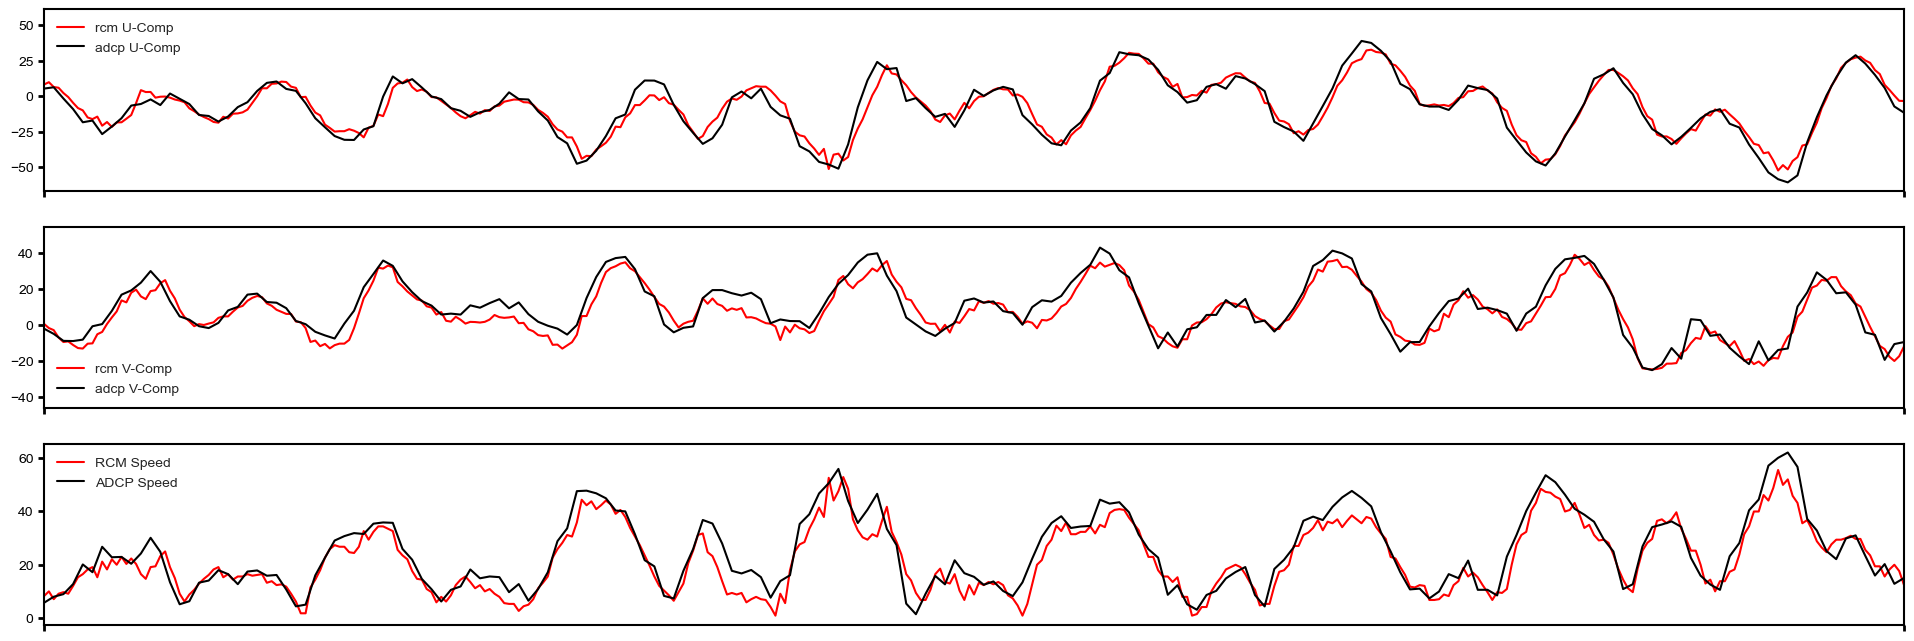

In [36]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
# copy is in the notebook examples
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(3,figsize=(24, 8),sharex=True)
ax[0].plot(rcm_data.index,rcm_data.u_comp_current,color='r',label='rcm U-Comp')
ax[1].plot(rcm_data.index,rcm_data.v_comp_current,color='r',label='rcm V-Comp')
ax[2].plot(rcm_data.index,
           np.sqrt(rcm_data.v_comp_current**2 + rcm_data.u_comp_current**2),
           color='r',label='RCM Speed')
ax[0].plot(adcp_data.index.get_level_values('time'),adcp_data.u_curr_comp,'k',label='adcp U-Comp')
ax[1].plot(adcp_data.index.get_level_values('time'),adcp_data.v_curr_comp,'k',label='adcp V-Comp')
ax[2].plot(adcp_data.index.get_level_values('time'),
           np.sqrt(adcp_data.v_curr_comp**2 + adcp_data.u_curr_comp**2),
           color='k',label='ADCP Speed')
ax[0].legend()
ax[1].legend()
ax[2].legend()

xfmt = mdates.DateFormatter('%d-%b')
ax[2].xaxis.set_major_locator(DayLocator(bymonthday=1))
ax[2].xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax[2].xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(DateFormatter(''))
ax[2].xaxis.set_tick_params(which='major', pad=3)
ax[2].xaxis.set_tick_params(which='minor', pad=5)

ax[2].set_xlim([datetime.date(2022,12,18),datetime.date(2022,12,26)])

(19280.0, 19600.0)

<Figure size 640x480 with 0 Axes>

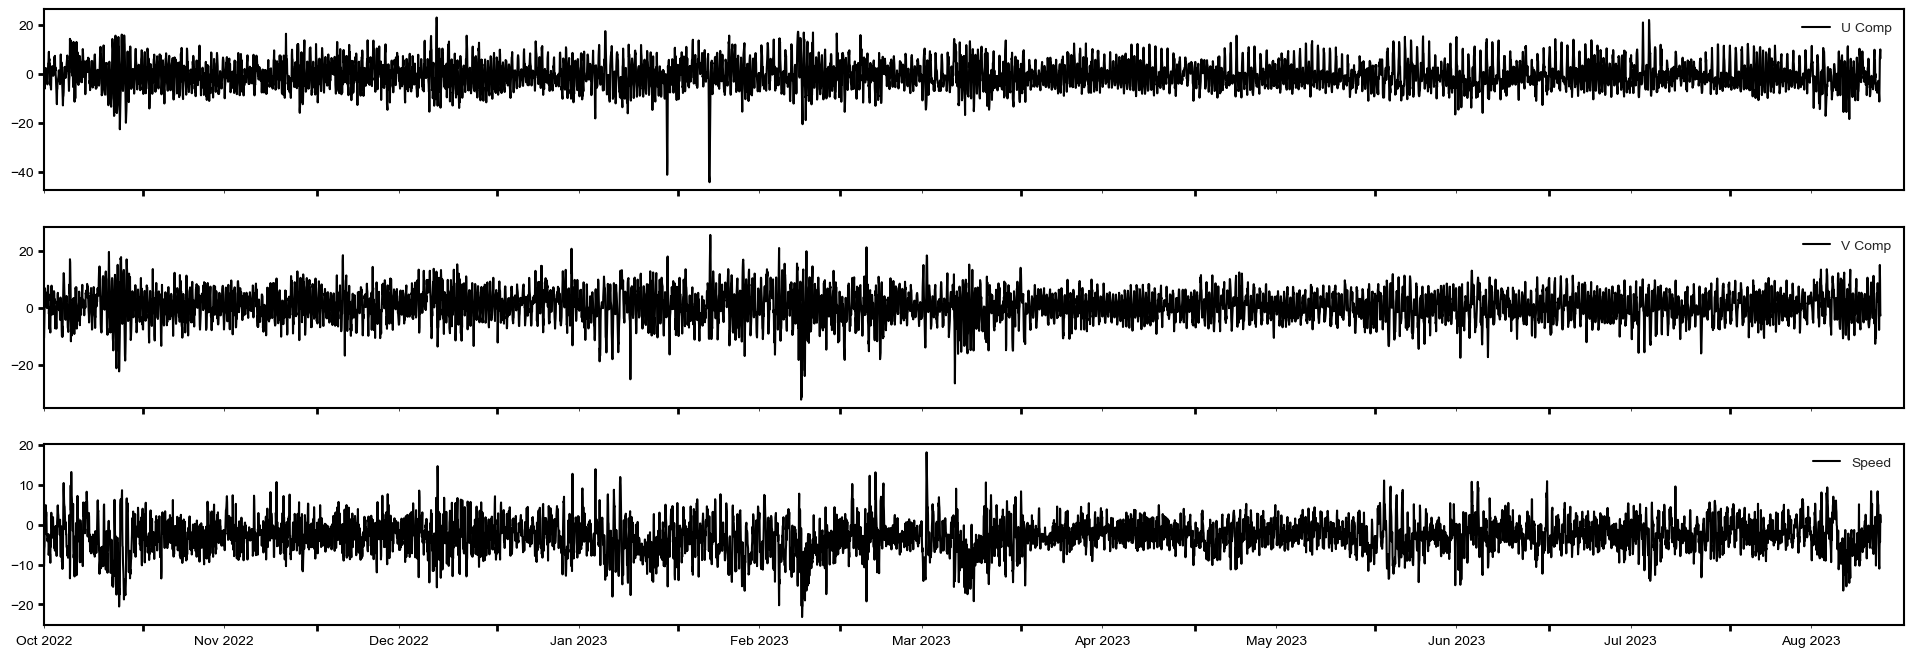

In [27]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
# copy is in the notebook examples
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(3,figsize=(24, 8),sharex=True)
ax[0].plot(rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True).index,
           adcp_data.loc['2022-10-15':'2023-8-26 23:00:00']['u_curr_comp']\
           -rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True)['u_comp_current'],
          color='k',label='U Comp')
ax[1].plot(rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True).index,
           adcp_data.loc['2022-10-15':'2023-8-26 23:00:00']['v_curr_comp']\
           -rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True)['v_comp_current'],
          color='k',label='V Comp')
ax[2].plot(rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True).index,
           np.sqrt(rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True)['v_comp_current']**2 \
                   + rcm_data.loc['2022-10-15':'2023-8-26'].resample('1H').mean(numeric_only=True)['u_comp_current']**2) -\
           np.sqrt(adcp_data.loc['2022-10-15':'2023-8-26 23:00:00']['v_curr_comp']**2 + adcp_data.loc['2022-10-15':'2023-8-26 23:00:00']['u_curr_comp']**2),
           color='k',label='Speed')
ax[0].legend()
ax[1].legend()
ax[2].legend()

xfmt = mdates.DateFormatter('%d-%b')
ax[2].xaxis.set_major_locator(DayLocator(bymonthday=1))
ax[2].xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax[2].xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(DateFormatter(''))
ax[2].xaxis.set_tick_params(which='major', pad=3)
ax[2].xaxis.set_tick_params(which='minor', pad=5)

ax[2].set_xlim([datetime.date(2022,10,15),datetime.date(2023,8,31)])